# Evaluation

In [1]:
import sys
sys.path.append('..')

In [2]:
# Loading useful libraries

import numpy as np
import pandas as pd

import pickle

from sklearn.metrics import accuracy_score, f1_score, PrecisionRecallDisplay, precision_score, recall_score, r2_score

import Demo2

In [3]:
# Selecting "regression" or "classification"

model_type = "classification"

assert(model_type in ["regression", "classification"])

In [4]:
# Loading data

X_test = pd.read_csv(f'../tmp/X_test_{model_type}.csv', index_col='User_ID')
y_test = pd.read_csv(f'../tmp/y_test_{model_type}.csv', index_col='User_ID')['is_BigSpender']


# Loading model

with open('../tmp/model.pkl', 'rb') as f:
    model = pickle.load(f)

In [5]:
# Selecting metric
metric = recall_score

# Computing score
score_test = metric(y_test, model.predict(X_test))
score_test

0.34971098265895956

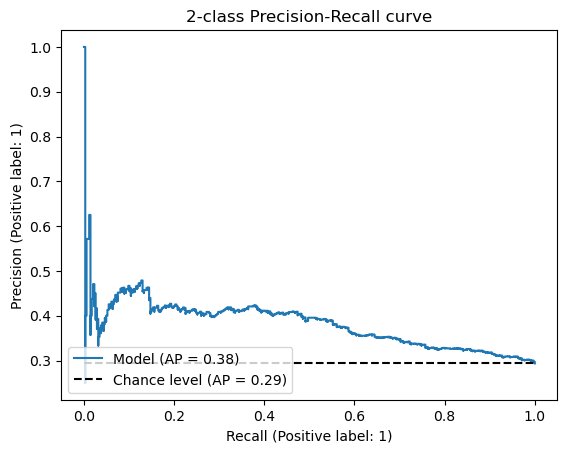

In [6]:
if model_type == "classification":
    display = PrecisionRecallDisplay.from_estimator(
        model, X_test, y_test, name="Model", plot_chance_level=True
    )
    _ = display.ax_.set_title("2-class Precision-Recall curve")

In [8]:
if model_type == "classification":
    print(
    f"""Accuracy: {accuracy_score(y_test, model.predict(X_test))}
Precision: {precision_score(y_test, model.predict(X_test))}
Recall: {recall_score(y_test, model.predict(X_test))}""")

Accuracy: 0.6615776081424937
Precision: 0.4101694915254237
Recall: 0.34971098265895956
